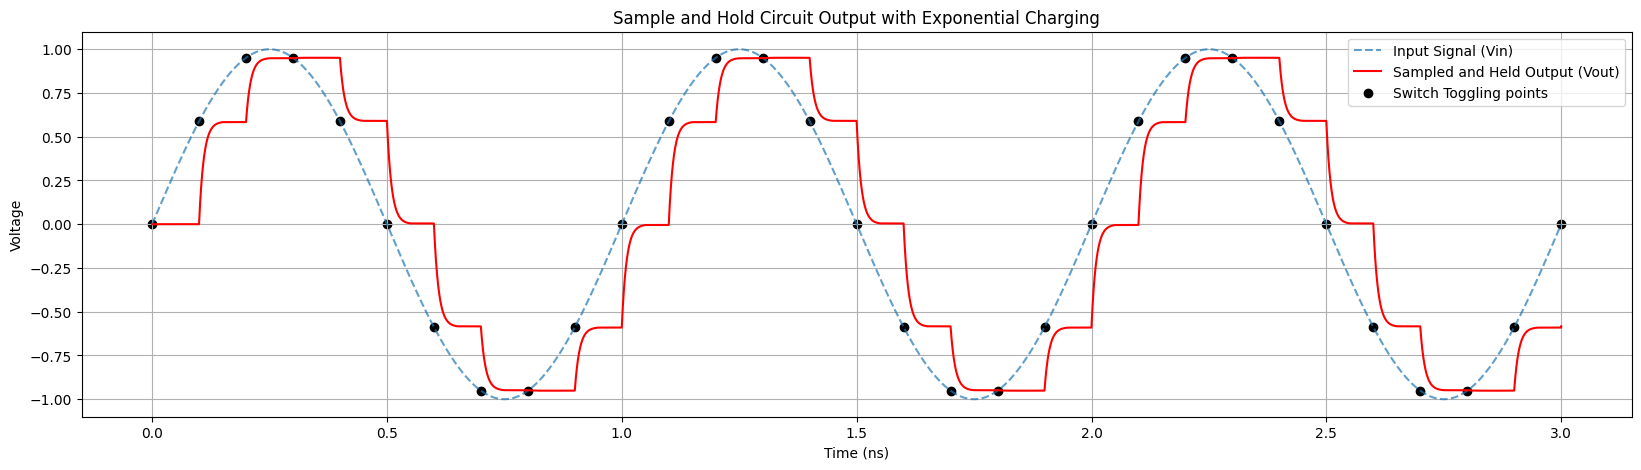

Length of t_samples: 31
Length of vout: 500000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f_in = 1e9
f_s = 10e9
tau = 10e-12

T_s = 1 / f_s
T_in = 1 / f_in

t_max = 3 * T_in
t = np.linspace(0, t_max, 500000)

Vin = np.sin(2 * np.pi * f_in * t)

t_samples = np.arange(0, t_max, T_s)
Vin_samples = np.sin(2 * np.pi * f_in * t_samples)

Vout = np.zeros_like(t)
last_sample = 0
sample_index = 0
switch_state = 0
t_start = 0

for i in range(len(t)):
    if sample_index < len(t_samples) and np.isclose(t[i], t_samples[sample_index], atol=T_s / 1000):
        switch_state = 1
        t_start = t[i]
        last_sample = Vout[i-1] if i > 0 else 0
        target_sample = Vin[i]
        sample_index += 1

    if switch_state == 1:
        Vout[i] = last_sample + (target_sample - last_sample) * (1 - np.exp(-(t[i] - t_start) / tau))
        if t[i] - t_start >= T_s / 2:
            switch_state = 0
            last_sample = Vout[i]
    else:
        Vout[i] = last_sample

plt.figure(figsize=(20, 5))
plt.plot(t * 1e9, Vin, label="Input Signal (Vin)", linestyle="dashed", alpha=0.7)
plt.plot(t * 1e9, Vout, label="Sampled and Held Output (Vout)", color="red")
plt.scatter(t_samples * 1e9, Vin_samples, color="black", marker="o", label="Switch Toggling points")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage")
plt.title("Sample and Hold Circuit Output with Exponential Charging")
plt.legend()
plt.grid()
plt.show()

print("Length of t_samples:", len(t_samples))
print("Length of vout:", len(Vout))


Ratio of Variances: 8.829
Variance of Original Sampling Error (E): 1.122609e-03 V^2
Variance of Uniform Quantization Noise: 1.271566e-04 V^2


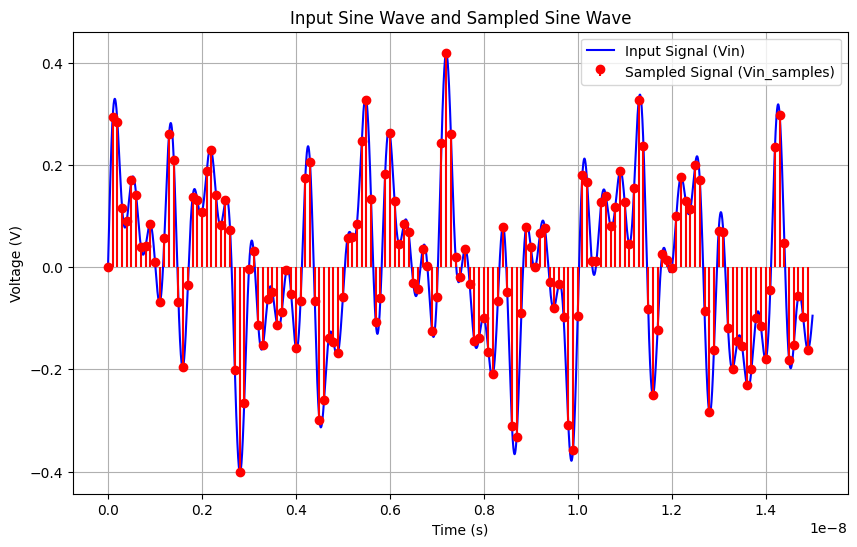

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ADC Parameters
N = 7  # Bit resolution
Vfs = 5  # Full-scale voltage
tau = 5.02e-12  # Sample-and-hold time constant
f_s = 10e9  # Sampling frequency
T_s = 1 / f_s  # Sampling period

# Multi-Tone Input Signal
frequencies = [0.2e9, 0.58e9, 1e9, 1.7e9, 2.4e9]
t_max = 3 / min(frequencies)  # 3 periods of lowest frequency
t = np.linspace(0, t_max, 100000)  # High-resolution time vector
Vin = 0.5 * np.sum([np.sin(2 * np.pi * f * t) for f in frequencies], axis=0) / len(frequencies)

# Sampling
t_samples = np.arange(0, t_max, T_s)
Vin_samples = 0.5 * np.sum([np.sin(2 * np.pi * f * t_samples) for f in frequencies], axis=0) / len(frequencies)

# Sample-and-Hold Model
Vout = np.zeros_like(t)
last_sample = 0
sample_index = 0
switch_state = 0
t_start = 0

for i in range(len(t)):
    if sample_index < len(t_samples) and np.isclose(t[i], t_samples[sample_index], atol=T_s / 10):
        switch_state = 1
        t_start = t[i]
        last_sample = Vout[i-1] if i > 0 else 0
        target_sample = Vin[i]
        sample_index += 1

    if switch_state == 1:
        Vout[i] = last_sample + (target_sample - last_sample) * (1 - np.exp(-(t[i] - t_start) / tau))
        if t[i] - t_start >= T_s / 2:
            switch_state = 0
            last_sample = Vout[i]
    else:
        Vout[i] = last_sample

# Sample Vout at t_samples without interpolation
Vout_samples = Vout[np.searchsorted(t, t_samples)]

# ADC Quantization
Q_levels = 2 ** N
delta = Vfs / Q_levels  # LSB size
Vout_quantized = np.round(Vout_samples / delta) * delta  # Quantized output

# Compute Original Error Signal E (before correction)
E_original = Vout_quantized - Vin_samples
var_E_original = np.var(E_original)

# Compute Quantization Noise Variance
var_q = (delta ** 2) / 12  # Theoretical uniform quantization noise variance

ratio = var_E_original / var_q
print(f"Ratio of Variances: {ratio:.3f}")
# Print results
print(f"Variance of Original Sampling Error (E): {var_E_original:.6e} V^2")
print(f"Variance of Uniform Quantization Noise: {var_q:.6e} V^2")

# Plot Input and Sampled Sine Wave
plt.figure(figsize=(10, 6))
plt.plot(t, Vin, label="Input Signal (Vin)", color='b', linewidth=1.5)
plt.stem(t_samples, Vin_samples, 'r', markerfmt='ro', label="Sampled Signal (Vin_samples)", basefmt=" ")
plt.title("Input Sine Wave and Sampled Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.show()


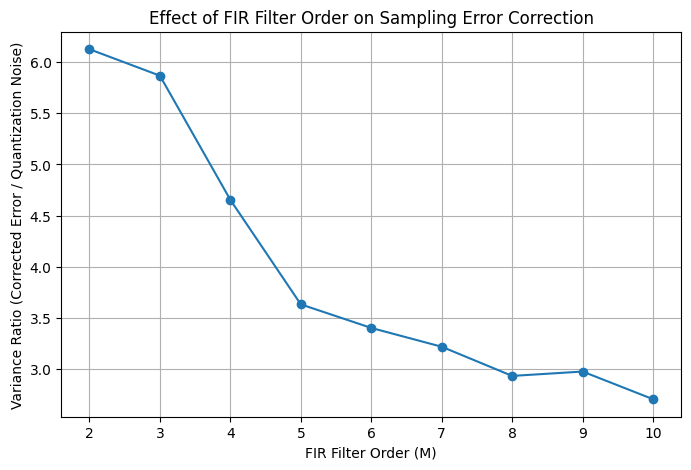

Variance of Original Sampling Error (E): 1.122609e-03 V^2
Variance of Uniform Quantization Noise: 1.271566e-04 V^2
Variance Ratios for different M values:
M=2: 6.126
M=3: 5.868
M=4: 4.654
M=5: 3.633
M=6: 3.402
M=7: 3.219
M=8: 2.934
M=9: 2.976
M=10: 2.706


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ADC Parameters
N = 7  # Bit resolution
Vfs = 5  # Full-scale voltage
tau = 5.02e-12  # Sample-and-hold time constant
f_s = 10e9  # Sampling frequency
T_s = 1 / f_s  # Sampling period

# Multi-Tone Input Signal
frequencies = [0.2e9, 0.58e9, 1e9, 1.7e9, 2.4e9]
t_max = 3 / min(frequencies)  # 3 periods of lowest frequency
t = np.linspace(0, t_max, 100000)  # High-resolution time vector
Vin = 0.5 * np.sum([np.sin(2 * np.pi * f * t) for f in frequencies], axis=0) / len(frequencies)

# Sampling
t_samples = np.arange(0, t_max, T_s)
Vin_samples = 0.5 * np.sum([np.sin(2 * np.pi * f * t_samples) for f in frequencies], axis=0) / len(frequencies)

# Sample-and-Hold Model
Vout = np.zeros_like(t)
last_sample = 0
sample_index = 0
switch_state = 0
t_start = 0

for i in range(len(t)):
    if sample_index < len(t_samples) and np.isclose(t[i], t_samples[sample_index], atol=T_s / 10):
        switch_state = 1
        t_start = t[i]
        last_sample = Vout[i-1] if i > 0 else 0
        target_sample = Vin[i]
        sample_index += 1

    if switch_state == 1:
        Vout[i] = last_sample + (target_sample - last_sample) * (1 - np.exp(-(t[i] - t_start) / tau))
        if t[i] - t_start >= T_s / 2:
            switch_state = 0
            last_sample = Vout[i]
    else:
        Vout[i] = last_sample

# Sample Vout at t_samples without interpolation
Vout_samples = Vout[np.searchsorted(t, t_samples)]

# ADC Quantization
Q_levels = 2 ** N
delta = Vfs / Q_levels  # LSB size
Vout_quantized = np.round(Vout_samples / delta) * delta  # Quantized output

# Compute Original Error Signal E (before correction)
E_original = Vout_quantized - Vin_samples
var_E_original = np.var(E_original)

# Compute Quantization Noise Variance
var_q = (delta ** 2) / 12  # Theoretical uniform quantization noise variance

# FIR Filter to Estimate Sampling Error
M_values = np.arange(2, 11)  # M varies from 2 to 10
variance_ratios = []

for M in M_values:
    # Construct input matrix for Least Squares Estimation
    X = np.zeros((len(Vout_quantized) - M + 1, M - 1))
    Y = np.zeros(len(Vout_quantized) - M + 1)

    for i in range(len(Y)):
        X[i, :] = Vout_quantized[i:i + M - 1]  # Use M-1 previous samples
        Y[i] = E_original[i + M - 1]  # Target error

    # Solve Least Squares: Find FIR filter coefficients
    h = np.linalg.lstsq(X, Y, rcond=None)[0]

    # Estimate the error using the FIR filter
    E_estimated = np.zeros_like(E_original)
    for i in range(M - 1, len(Vout_quantized)):
        E_estimated[i] = np.dot(h, Vout_quantized[i - M + 1:i])

    # Correct the ADC output
    Vout_corrected = Vout_quantized - E_estimated

    # Compute New Error
    E_corrected = Vout_corrected - Vin_samples
    var_E_corrected = np.var(E_corrected)

    # Compute Ratio of Variances
    variance_ratio = var_E_corrected / var_q
    variance_ratios.append(variance_ratio)

# Plot the Variance Ratio vs. M
plt.figure(figsize=(8, 5))
plt.plot(M_values, variance_ratios, marker='o', linestyle='-')
plt.xlabel("FIR Filter Order (M)")
plt.ylabel("Variance Ratio (Corrected Error / Quantization Noise)")
plt.title("Effect of FIR Filter Order on Sampling Error Correction")
plt.grid()
plt.show()

# Print results
print(f"Variance of Original Sampling Error (E): {var_E_original:.6e} V^2")
print(f"Variance of Uniform Quantization Noise: {var_q:.6e} V^2")
print("Variance Ratios for different M values:")
for M, ratio in zip(M_values, variance_ratios):
    print(f"M={M}: {ratio:.3f}")


SNDR: -18.02 dB


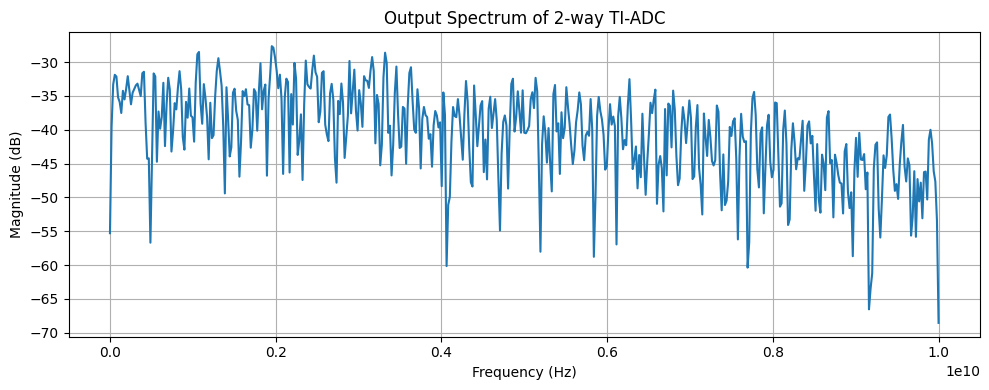

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Simulation parameters
bit_rate = 10e9              # 10 Gbps
T_bit = 1 / bit_rate         # Bit period = 100 ps
n_bits = 1024                # Number of bits in NRZ signal
fs = 40e9                    # Oversample at 4x the bit rate
dt = 1 / fs                  # Sampling time step
t_total = np.arange(0, n_bits * T_bit, dt)

# Generate random NRZ signal (amplitude 0.5 V)
bitstream = np.random.choice([0.5, -0.5], size=n_bits)
nrz_signal = np.repeat(bitstream, int(T_bit/dt))

# Time vectors for 2-way TI-ADC channels (interleaved sampling)
t0 = np.arange(0, len(nrz_signal)*dt, 2*T_bit)          # Channel 0
t1 = np.arange(T_bit, len(nrz_signal)*dt, 2*T_bit)      # Channel 1

# Function to simulate an ADC channel with mismatches
def adc_channel(signal, t_samples, offset=0.0, bandwidth=np.inf):
    t_full = np.arange(0, len(signal)) * dt
    # Apply bandwidth mismatch (simple low-pass filter model)
    if bandwidth < np.inf:
        from scipy.signal import butter, lfilter
        b, a = butter(1, 2*bandwidth/fs)
        signal = lfilter(b, a, signal)
    # Interpolate the signal at the sampling instants
    interpolated = np.interp(t_samples, t_full, signal)
    return interpolated + offset

# Simulate both channels
samples_ch0 = adc_channel(nrz_signal, t0, offset=0.0, bandwidth=7e9)
samples_ch1 = adc_channel(nrz_signal, t1, offset=0.01, bandwidth=5e9)

# Combine interleaved samples
samples_combined = np.empty(samples_ch0.size + samples_ch1.size)
samples_combined[0::2] = samples_ch0
samples_combined[1::2] = samples_ch1

# Quantize to 7-bit ADC
fs_adc = 20e9  # Effective sample rate = 2x T_bit
full_scale = 1.0
LSB = full_scale / (2**7)
samples_quantized = np.round((samples_combined + full_scale/2) / LSB) * LSB - full_scale/2

# Compute SNDR
def compute_sndr(signal):
    N = len(signal)
    spectrum = np.abs(fft(signal))[:N//2]
    signal_power = np.max(spectrum)**2
    noise_power = np.sum(spectrum**2) - signal_power
    sndr = 10 * np.log10(signal_power / noise_power)
    return sndr

# Plot SNDR
sndr_value = compute_sndr(samples_quantized)
print(f"SNDR: {sndr_value:.2f} dB")

# Optional: plot spectrum
plt.figure(figsize=(10, 4))
plt.magnitude_spectrum(samples_quantized, Fs=fs_adc, scale='dB')
plt.title("Output Spectrum of 2-way TI-ADC")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.tight_layout()
plt.show()


SNDR: -9.12 dB
SNDR after Time Calibration:
SNDR: -9.12 dB
SNDR after Offset Calibration:
SNDR: -15.06 dB
SNDR after Bandwidth Calibration:
SNDR: -13.94 dB


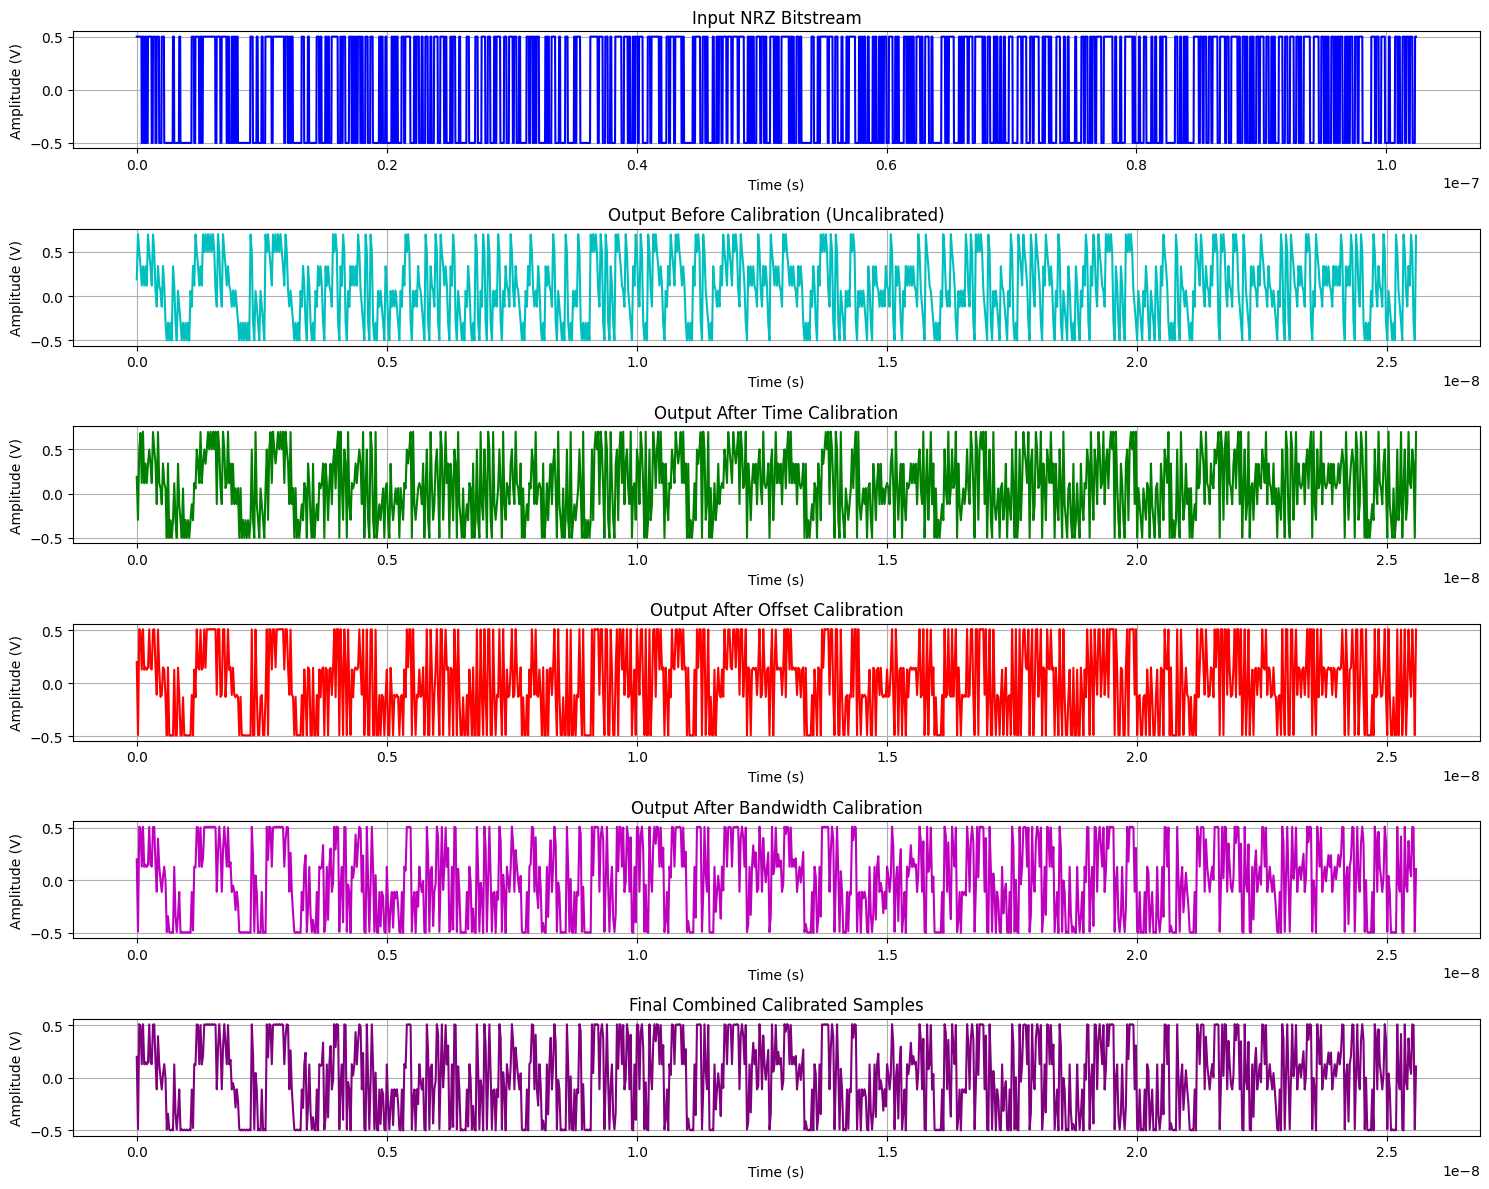

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, lfilter

# Simulation parameters
bit_rate = 10e9              # 10 Gbps
T_bit = 1 / bit_rate         # Bit period = 100 ps
n_bits = 1024                # Number of bits in NRZ signal
fs = 40e9                    # Oversample at 4x the bit rate
dt = 1 / fs                  # Sampling time step
t_total = np.arange(0, n_bits * T_bit, dt)

# Generate random NRZ signal (amplitude 0.5 V)
bitstream = np.random.choice([0.5, -0.5], size=n_bits)
nrz_signal = np.repeat(bitstream, int(T_bit/dt))

# Time vectors for 2-way TI-ADC channels with mismatches
# Time mismatch: add a small delay to one of the channels
time_mismatch = 0.5e-10  # 0.5 ns mismatch
t0 = np.arange(0, len(nrz_signal)*dt, 2*T_bit)          # Channel 0
t1 = np.arange(T_bit + time_mismatch, len(nrz_signal)*dt, 2*T_bit)  # Channel 1 with time mismatch

# Function to simulate an ADC channel with mismatches (time, offset, bandwidth)
import numpy as np
from scipy.signal import butter, lfilter

def adc_channel(signal, t_samples, offset=0.0, bandwidth=np.inf, time_mismatch=0.0):
    # Apply bandwidth mismatch (simple low-pass filter model)
    if bandwidth < np.inf:
        b, a = butter(1, 2*bandwidth/fs)
        signal = lfilter(b, a, signal)

    # Simulate the time mismatch by shifting the sample times (this adds delay)
    t_samples = t_samples + time_mismatch

    # Sample the signal at the misaligned time instances using interpolation
    signal_interpolated = np.interp(t_samples, np.arange(len(signal)) * dt, signal)

    # Apply offset calibration: add the offset to the signal
    signal_interpolated += offset

    return signal_interpolated


# Function to compute SNDR (Signal-to-Noise-and-Distortion Ratio)
def compute_sndr(signal):
    N = len(signal)
    spectrum = np.abs(fft(signal))[:N//2]
    signal_power = np.max(spectrum)**2
    noise_power = np.sum(spectrum**2) - signal_power
    sndr = 10 * np.log10(signal_power / noise_power)
    return sndr

# Time Calibration (Time-Interleaved ADC Calibration)
def time_calibration(samples_ch0, samples_ch1, time_mismatch):
    # Shift channel 1 to align with channel 0
    samples_ch1_corrected = np.roll(samples_ch1, int(time_mismatch / dt))
    return samples_ch0, samples_ch1_corrected

# Offset Calibration (Interleaved Channel Calibration)
def offset_calibration(samples_ch0, samples_ch1):
    offset_ch0 = np.mean(samples_ch0)
    offset_ch1 = np.mean(samples_ch1)
    corrected_ch0 = samples_ch0 - offset_ch0
    corrected_ch1 = samples_ch1 - offset_ch1
    return corrected_ch0, corrected_ch1

# Bandwidth Calibration (LMS Algorithm)
def bandwidth_calibration(samples_ch0, samples_ch1, mu=0.05, N=8):
    error = samples_ch0 - samples_ch1
    weights = np.zeros(N)
    # Gradual adjustment of the weights based on the error
    for i in range(N, len(samples_ch0)):
        # Use the previous N samples of samples_ch1
        x = samples_ch1[i-N:i]
        # Current desired value (samples_ch0)
        d = samples_ch0[i]
        # Prediction of samples_ch0 based on the previous N samples of samples_ch1
        y = np.dot(weights, x)
        # Calculate the error
        e = d - y
        # Update weights using LMS rule
        weights += mu * e * x
        # Instead of applying the correction to samples_ch1 directly (which could cause overshooting),
        # adjust the samples in a way that gradually reduces the error
        samples_ch1[i] = np.clip(samples_ch1[i] + e, -0.5, 0.5)

    return samples_ch0, samples_ch1

# Plot SNDR
def plot_sndr(samples_quantized):
    sndr_value = compute_sndr(samples_quantized)
    print(f"SNDR: {sndr_value:.2f} dB")

# Main calibration and simulation loop
def main():
    # Simulate both channels with mismatches (time, offset, bandwidth)
    samples_ch0 = adc_channel(nrz_signal, t0, offset=0.0, bandwidth=7e9, time_mismatch=0)
    samples_ch1 = adc_channel(nrz_signal, t1, offset=0.2, bandwidth=6.5e9, time_mismatch=0.5e-10)

    # Combine interleaved samples
    samples_combined = np.empty(samples_ch0.size + samples_ch1.size)
    samples_combined[0::2] = samples_ch0
    samples_combined[1::2] = samples_ch1

    # Before calibration: compute SNDR for the uncalibrated channels
    plot_sndr(samples_combined)

    # Stage 1: Time Calibration
    samples_ch0_time_calibrated, samples_ch1_time_calibrated = time_calibration(samples_ch0, samples_ch1, time_mismatch)
    samples_combined_time_calibrated = np.empty(samples_ch0_time_calibrated.size + samples_ch1_time_calibrated.size)
    samples_combined_time_calibrated[0::2] = samples_ch0_time_calibrated
    samples_combined_time_calibrated[1::2] = samples_ch1_time_calibrated
    print("SNDR after Time Calibration:")
    plot_sndr(samples_combined_time_calibrated)

    # Stage 2: Offset Calibration
    samples_ch0_offset_calibrated, samples_ch1_offset_calibrated = offset_calibration(samples_ch0_time_calibrated, samples_ch1_time_calibrated)
    samples_combined_offset_calibrated = np.empty(samples_ch0_offset_calibrated.size + samples_ch1_offset_calibrated.size)
    samples_combined_offset_calibrated[0::2] = samples_ch0_offset_calibrated
    samples_combined_offset_calibrated[1::2] = samples_ch1_offset_calibrated
    print("SNDR after Offset Calibration:")
    plot_sndr(samples_combined_offset_calibrated)

    # Stage 3: Bandwidth Calibration
    samples_ch0_bandwidth_calibrated, samples_ch1_bandwidth_calibrated = bandwidth_calibration(samples_ch0_offset_calibrated, samples_ch1_offset_calibrated)
    samples_combined_bandwidth_calibrated = np.empty(samples_ch0_bandwidth_calibrated.size + samples_ch1_bandwidth_calibrated.size)
    samples_combined_bandwidth_calibrated[0::2] = samples_ch0_bandwidth_calibrated
    samples_combined_bandwidth_calibrated[1::2] = samples_ch1_bandwidth_calibrated
    print("SNDR after Bandwidth Calibration:")
    plot_sndr(samples_combined_bandwidth_calibrated)

    # Plot the input NRZ bitstream and output after each calibration stage
    plt.figure(figsize=(15, 12))

    # Plot NRZ Input Signal
    plt.subplot(6, 1, 1)  # Added a new subplot for the original NRZ signal
    plt.plot(t_total[:len(nrz_signal)], nrz_signal, label="Input NRZ Signal", color='b')
    plt.title("Input NRZ Bitstream")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (V)")
    plt.grid(True)

    # Plot Output Before Calibration (uncalibrated ADC outputs)
    plt.subplot(6, 1, 2)  # Added another subplot for uncalibrated output
    plt.plot(np.arange(0, len(samples_combined)) * dt, samples_combined, label="Output before Calibration", color='c')
    plt.title("Output Before Calibration (Uncalibrated)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (V)")
    plt.grid(True)

    # Plot Output After Time Calibration
    plt.subplot(6, 1, 3)
    plt.plot(np.arange(0, len(samples_combined_time_calibrated)) * dt, samples_combined_time_calibrated, label="Output after Time Calibration", color='g')
    plt.title("Output After Time Calibration")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (V)")
    plt.grid(True)

    # Plot Output After Offset Calibration
    plt.subplot(6, 1, 4)
    plt.plot(np.arange(0, len(samples_combined_offset_calibrated)) * dt, samples_combined_offset_calibrated, label="Output after Offset Calibration", color='r')
    plt.title("Output After Offset Calibration")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (V)")
    plt.grid(True)

    # Plot Output After Bandwidth Calibration
    plt.subplot(6, 1, 5)
    plt.plot(np.arange(0, len(samples_combined_bandwidth_calibrated)) * dt, samples_combined_bandwidth_calibrated, label="Output after Bandwidth Calibration", color='m')
    plt.title("Output After Bandwidth Calibration")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (V)")
    plt.grid(True)

    # Plot Final Combined Calibrated Samples
    plt.subplot(6, 1, 6)  # New subplot for the final combined calibrated samples
    plt.plot(np.arange(0, len(samples_combined_bandwidth_calibrated)) * dt, samples_combined_bandwidth_calibrated, label="Final Combined Calibrated Samples", color='purple')
    plt.title("Final Combined Calibrated Samples")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (V)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
